# NORMALISED CUT

In [1]:
# Imports
%matplotlib inline

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import json

In [2]:
# Opening json version
with open('./results/data_nc.json', 'r') as file:
    data = json.load(file)

In [3]:
data_df = pd.DataFrame(data)

# Saving latex version
data_df.to_latex('./latex/NormalisedCut/data_nc.tex', index=False)

In [4]:
# Retrieving the best and the worst configurations for each PCA dimension based on the rand index
best_data = []
worst_data = []
for i in range(len(data)):
    best = max(data[i]['outcomes'], key = lambda x: x['rand_index'])
    worst = min(data[i]['outcomes'], key = lambda x: x['rand_index'])
    best_data.append({
        'PCA': data[i]['PCA'],
        'n_clusters': best['n_clusters'],
        'rand_index': best['rand_index'],
        'fit_predict_time': best['fit_predict_time'],
    })
    worst_data.append({
        'PCA': data[i]['PCA'],
        'n_clusters': worst['n_clusters'],
        'rand_index': worst['rand_index'],
        'fit_predict_time': worst['fit_predict_time'],
    })

In [5]:
# Transforming lists into DataFrames and obtaining the latex version 
best_df = pd.DataFrame(best_data)
best_df.to_latex('./latex/NormalisedCut/best_data_nc.tex', index=False)
best_df

,PCA,n_clusters,rand_index,fit_predict_time
0,2,15,0.871916,9.968873
1,12,13,0.901773,93.925697
2,22,13,0.928241,97.104162
3,32,13,0.929651,93.535461
4,42,13,0.929304,118.644037
5,52,13,0.929534,84.306271
6,62,13,0.928363,89.661510
7,72,13,0.928123,140.997974
8,82,13,0.927270,132.329518
9,92,13,0.926467,92.206803


In [6]:
# Transforming lists into DataFrames and obtaining the latex version 
worst_df = pd.DataFrame(worst_data)
worst_df.to_latex('./latex/NormalisedCut/worst_data_nc.tex', index=False)
worst_df

,PCA,n_clusters,rand_index,fit_predict_time
0,2,5,0.775228,10.124946
1,12,5,0.721537,88.893354
2,22,5,0.733339,85.485062
3,32,5,0.734934,96.552469
4,42,5,0.735248,119.664068
5,52,5,0.780706,84.633018
6,62,5,0.792947,90.187418
7,72,5,0.796712,141.308990
8,82,5,0.797973,133.021512
9,92,5,0.796743,93.475973


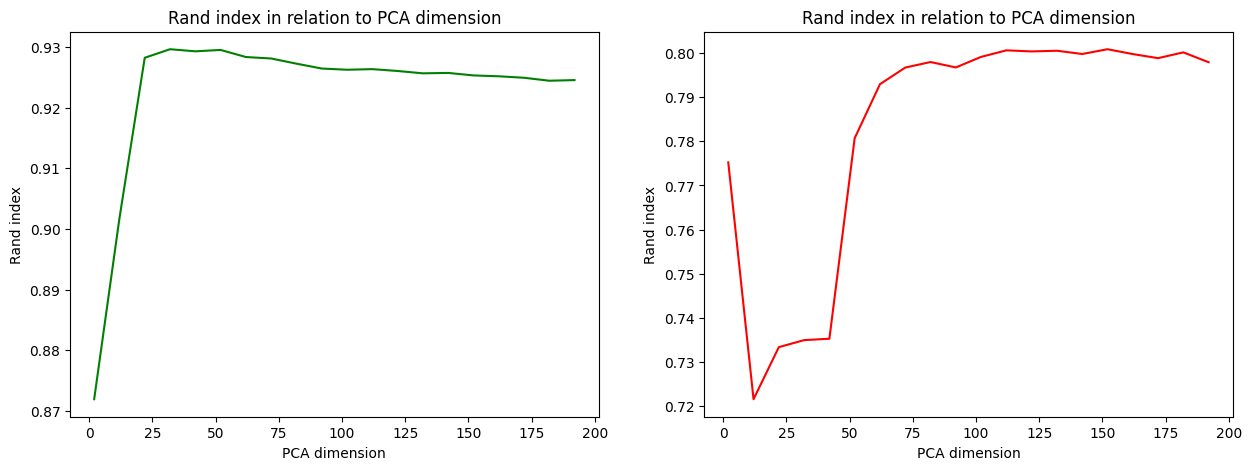

In [7]:
# Plot 'Rand index vs PCA dimension'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(best_df['PCA'], best_df['rand_index'], color = 'green')
ax[0].set_xlabel("PCA dimension") 
ax[0].set_ylabel("Rand index")  
ax[0].set_title("Rand index in relation to PCA dimension")  
ax[1].plot(worst_df['PCA'], worst_df['rand_index'], color = 'red')
ax[1].set_xlabel("PCA dimension")  
ax[1].set_ylabel("Rand index")  
ax[1].set_title("Rand index in relation to PCA dimension")  
plt.show()

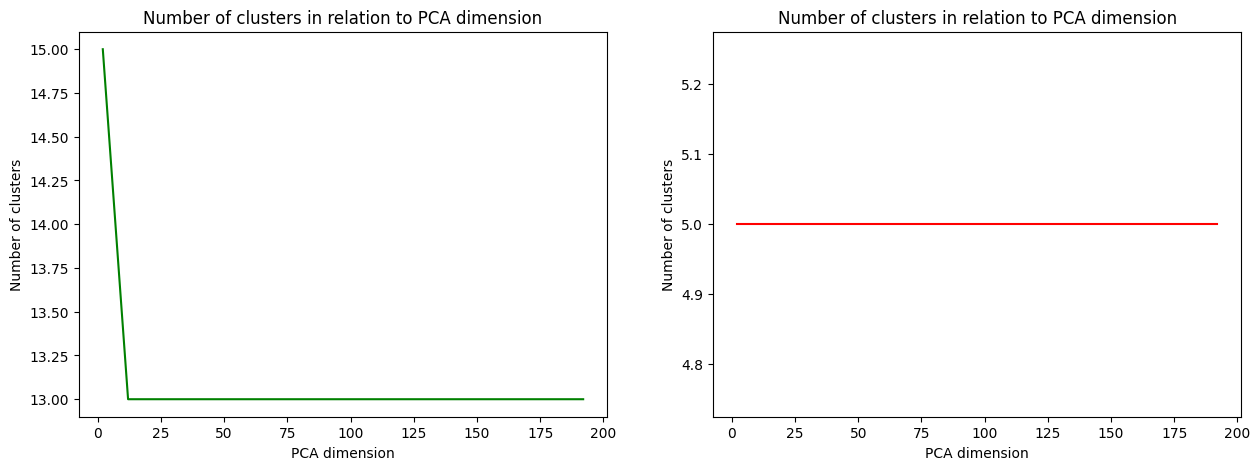

In [8]:
# Plot 'Number of clusters vs PCA dimension'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(best_df['PCA'], best_df['n_clusters'], color = 'green')
ax[0].set_xlabel("PCA dimension") 
ax[0].set_ylabel("Number of clusters")  
ax[0].set_title("Number of clusters in relation to PCA dimension")  
ax[1].plot(worst_df['PCA'], worst_df['n_clusters'], color = 'red')
ax[1].set_xlabel("PCA dimension")  
ax[1].set_ylabel("Number of clusters")  
ax[1].set_title("Number of clusters in relation to PCA dimension")  
plt.show()

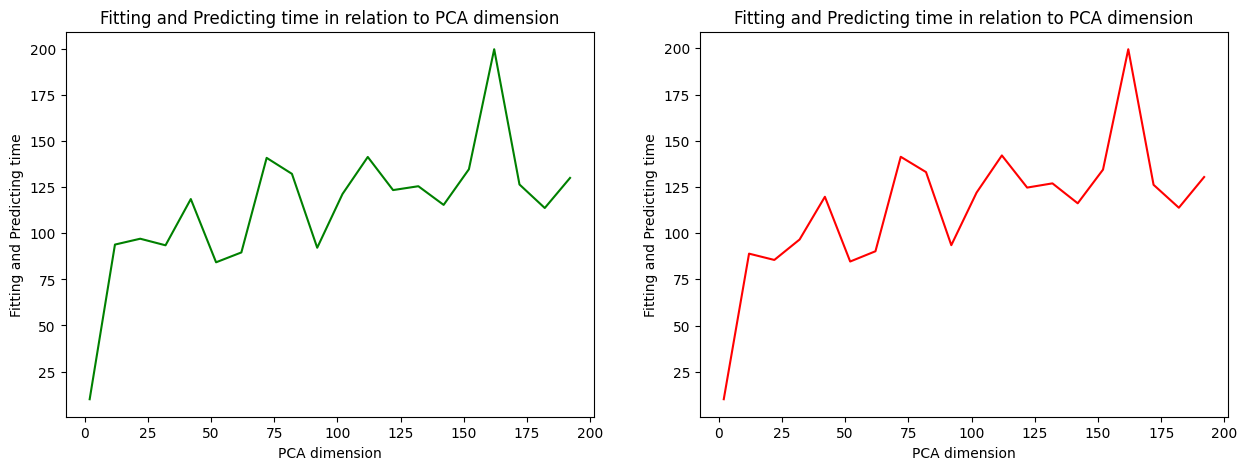

In [9]:
# Plot 'Fitting and Predicting time vs PCA dimension'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(best_df['PCA'], best_df['fit_predict_time'], color = 'green')
ax[0].set_xlabel("PCA dimension") 
ax[0].set_ylabel("Fitting and Predicting time")  
ax[0].set_title("Fitting and Predicting time in relation to PCA dimension")  
ax[1].plot(worst_df['PCA'], worst_df['fit_predict_time'], color = 'red')
ax[1].set_xlabel("PCA dimension")  
ax[1].set_ylabel("Fitting and Predicting time")  
ax[1].set_title("Fitting and Predicting time in relation to PCA dimension")  
plt.show()

In [10]:
# Retrieving the DataFrames
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

In [11]:
# Retrieving the best and the worst configuration based on the rand index among all configurations
best_model = best_df.iloc[best_df['rand_index'].idxmax()]
best_model.to_latex('./latex/NormalisedCut/best_model_nc.tex', index=False)
worst_model = worst_df.iloc[worst_df['rand_index'].idxmin()]
worst_model.to_latex('./latex/NormalisedCut/worst_model_nc.tex', index=False)

In [12]:
# Best model
best_model

PCA                 32.000000
n_clusters          13.000000
rand_index           0.929651
fit_predict_time    93.535461
Name: 3, dtype: float64

In [13]:
# Worst model
worst_model

PCA                 12.000000
n_clusters           5.000000
rand_index           0.721537
fit_predict_time    88.893354
Name: 1, dtype: float64

In [14]:
# Computing Pricipal Component Analysis
pca = PCA(n_components = 2)
print("Computing PCA with ", 2," components ...")
X_pca = pca.fit_transform(X)

Computing PCA with  2  components ...


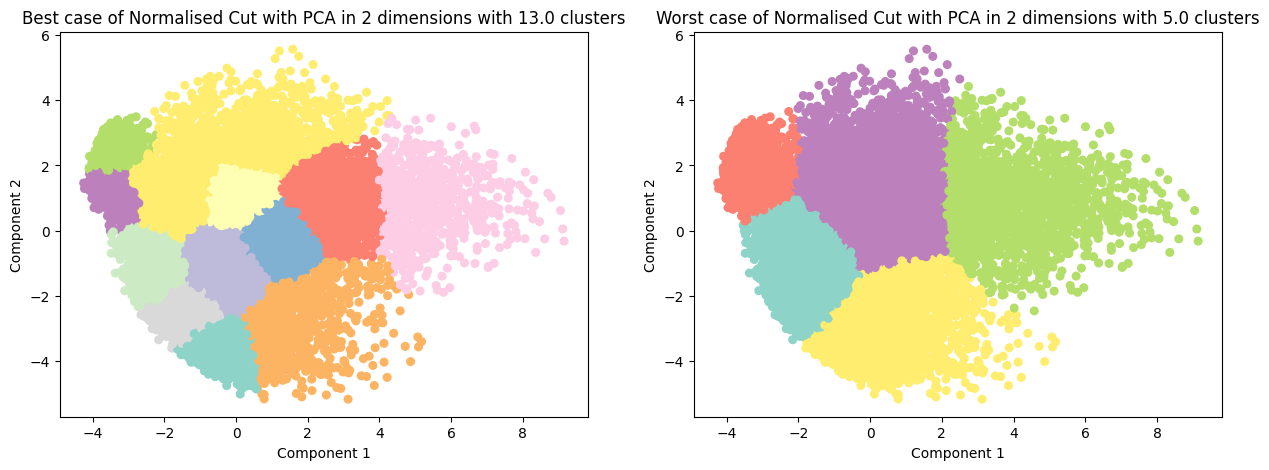

In [15]:
# Applying Normalised Cut model
best_nc = SpectralClustering(n_clusters = int(best_model['n_clusters']), random_state = 42, affinity = "nearest_neighbors", n_neighbors = 30, n_jobs = -1)
worst_nc = SpectralClustering(n_clusters = int(worst_model['n_clusters']), random_state = 42, affinity = "nearest_neighbors", n_neighbors = 30, n_jobs = -1)

X_pca = pca.fit_transform(X)

best_labels = best_nc.fit_predict(X_pca)
worst_labels = worst_nc.fit_predict(X_pca)

# Plot the projected points of the best and the worst configurations
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c = best_labels, s = 30, cmap = "Set3")
ax[0].set_ylabel("Component 2")
ax[0].set_xlabel("Component 1")
ax[0].set_title(f"Best case of Normalised Cut with PCA in 2 dimensions with {best_model['n_clusters']} clusters")
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c = worst_labels, s = 30, cmap = "Set3")
ax[1].set_ylabel("Component 2")
ax[1].set_xlabel("Component 1")
ax[1].set_title(f"Worst case of Normalised Cut with PCA in 2 dimensions with {worst_model['n_clusters']} clusters")
plt.show()

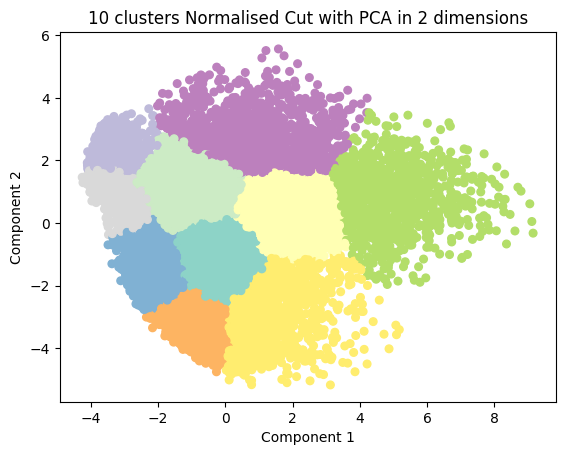

In [16]:
# Normalised Cut with 10 clusters
nc_10 = SpectralClustering(n_clusters = 10, random_state = 42, affinity = "nearest_neighbors", n_neighbors = 30, n_jobs = -1)

labels_nc_10 = nc_10.fit_predict(X_pca)

# Plot of the found labels of the 2 models
plt.plot(figsize = (15, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = labels_nc_10, s = 30, cmap = "Set3")
plt.ylabel("Component 2")
plt.xlabel("Component 1")
plt.title("10 clusters Normalised Cut with PCA in 2 dimensions")
plt.show()